In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


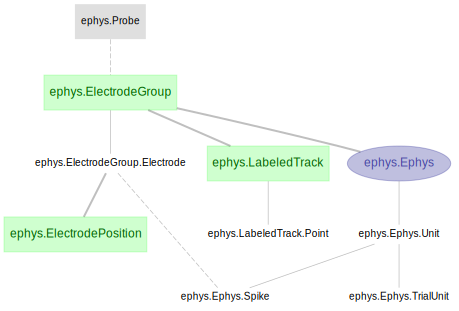

In [3]:
dj.ERD(ephys)

In [4]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

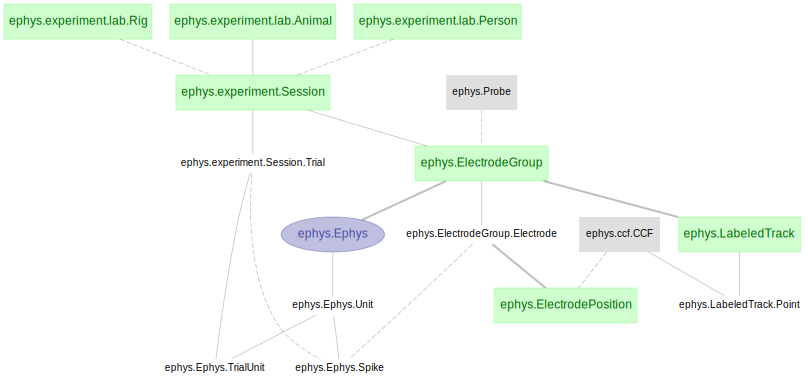

In [5]:
dj.ERD(ephys)-2

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400483,2017-08-01


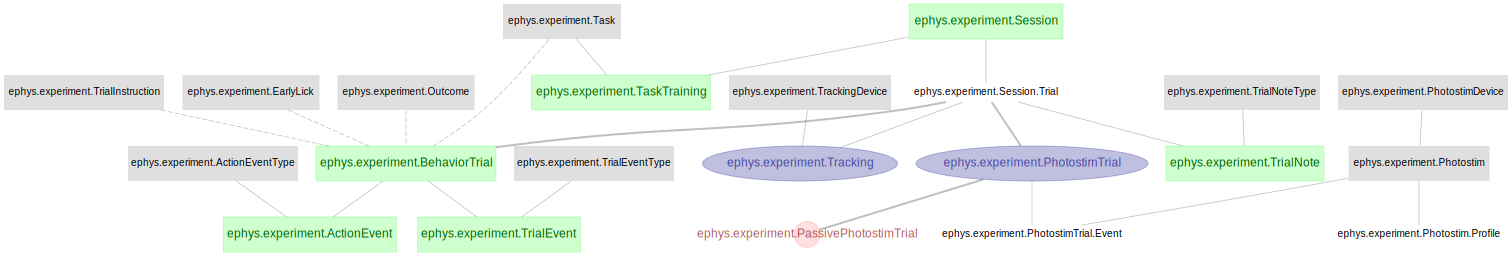

In [7]:
dj.ERD(ephys.experiment)

In [8]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
123456,1,2017-10-21,daveliu,RRig
399752,1,2017-11-14,daveliu,TRig1
399752,2,2017-11-16,daveliu,TRig1
399752,3,2017-11-22,daveliu,TRig1
399752,4,2017-11-23,daveliu,TRig1
399752,5,2017-11-24,daveliu,TRig1
399752,6,2017-11-26,daveliu,TRig1


In [9]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
ephys.Probe()

probe_part_no,probe_description
123123123,neuropixel probe


In [11]:
eGroup=ephys.ElectrodeGroup()

In [12]:
#eGroup.insert1((123456, 1, 1, '123123123', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [14]:
eIns=eGroup.fetch1('animal', 'session', 'electrode_group')
eIns=eGroup.fetch1(dj.key) # fetch the dictionary
elect=eGroup.Electrode()
eIns
elect
#elect.insert(dict(eIns, electrode = 1))
elect.insert(list(dict(eIns, electrode = x) for x in range (1,374))) # list for batch insert

In [15]:
elect

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,electrode
123456,1,1,1
123456,1,1,2
123456,1,1,3
123456,1,1,4
123456,1,1,5
123456,1,1,6
123456,1,1,7


In [ ]:
list(dict(eIns, electrode = x) for x in range (1,374))

In [16]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [18]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['S_clu']['viClu'][0]) # index sorted by cluster
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster (unit) number
spike_times = f['viTime_spk'][0][ind] # spike times
mrPos_spk_x = f['mrPos_spk'][0][ind]
mrPos_spk_y = f['mrPos_spk'][1][ind]
viT_offset_file = f['viT_offset_file'][:] # start of each trial
sRateHz = f['P']['sRateHz'][0]
cviSpk_site = f['cviSpk_site'][:,0]
data = []
for column in f['cviSpk_site']:
    row_data = []
    for row_number in range(len(column)):            
        row_data.append(f[column[row_number]][:])   
    data.append(row_data)
# cluster index 0 is noise cluster
#plt.plot(mrPos_spk_y + mrPos_spk_x, cluster_ids, '.')
#data

In [20]:
clu_ids_diff = np.diff(cluster_ids)
clu_ids_diff = np.where(clu_ids_diff != 0)[0] + 1

In [21]:
units = np.split(spike_times, clu_ids_diff)


In [29]:
unit_ids = np.arange(len(clu_ids_diff)+1)

In [30]:
units
unit_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
list(zip((0,1),(0,1)))

[(0, 0), (1, 1)]

In [32]:
list((x, units[x]) for x in unit_ids) # memory issue if too big

[(0, array([55033139, 47500991, 18900701, ..., 20866751, 20592408, 11865995])),
 (1, array([73161087, 41985831, 64097215, ..., 64238280, 73424272, 61236829])),
 (2, array([51177617, 47038847, 60524380, ..., 30268823, 53455567, 37309472])),
 (3, array([17214243, 16868392, 16674453, 16566399, 16998411,  9138105,
         15718891, 16821810, 11704028, 21482058, 20955584, 19143049,
         15068354, 21087468, 24766575, 18828781, 17867407, 16432816,
         16546603, 19537021, 16666505, 12271223, 17861913, 19557395,
         17335625, 17519728, 17012431, 16382510, 14682016, 11686000,
         18801134, 17854798, 19291024, 16683771, 19031388, 33043274,
         26072255, 16262102, 19551772, 16433370, 16845503, 17728897,
         17110491, 21693874, 15992513, 17492935, 17522532, 15140568,
         16257890, 16817157, 19973560, 11717351, 16563857, 19392127,
         17820912, 17016491, 19025763, 19527459, 11935430, 19086526,
         19511617, 19718691, 17239037, 19228259, 19379371, 19576332

In [25]:
Ephys=ephys.Ephys()

In [27]:
Ephys.Unit()

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,unit,spike_times calculated attribute


In [ ]:
sRateHz

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
ephys.experiment.ActionEvent()